In [5]:
import importlib

# # First, import module objects
import AbstractCircuit
import DShor
import help_function
import FundamentalOperations

# Then reload the modules (if you're updating code dynamically)
importlib.reload(AbstractCircuit)
importlib.reload(DShor)
importlib.reload(help_function)
%load_ext autoreload
%autoreload 2
# Finally, import names into the current namespace
from AbstractCircuit import *
from DShor import *
from help_function import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
length = 5
N = 15
c = AbstractCircuit(0, {}, {})
for i in range(N):
    c.add_data()
control_qubits = []
target_qubits = []
working_qubits = []
for i in range(N//3):
    working_qubits.append(c[3*i])
    target_qubits.append(c[3*i+1])
    control_qubits.append(c[3*i+2])

print(control_qubits[0].pos)
table = {}
for i in range(2**len(control_qubits)):
    table[i] = i
c.lookup(table, control_qubits, target_qubits)
c.add(target_qubits, working_qubits)
c.draw_circuit()

2


c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x, x], [y_control, y_target], 'k-', linewidth=1, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y_control, 'ko', markersize=6, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x, x], [y_target - 0.2, y_target + 0.2], 'k-', linewidth=1, color = gate_colo

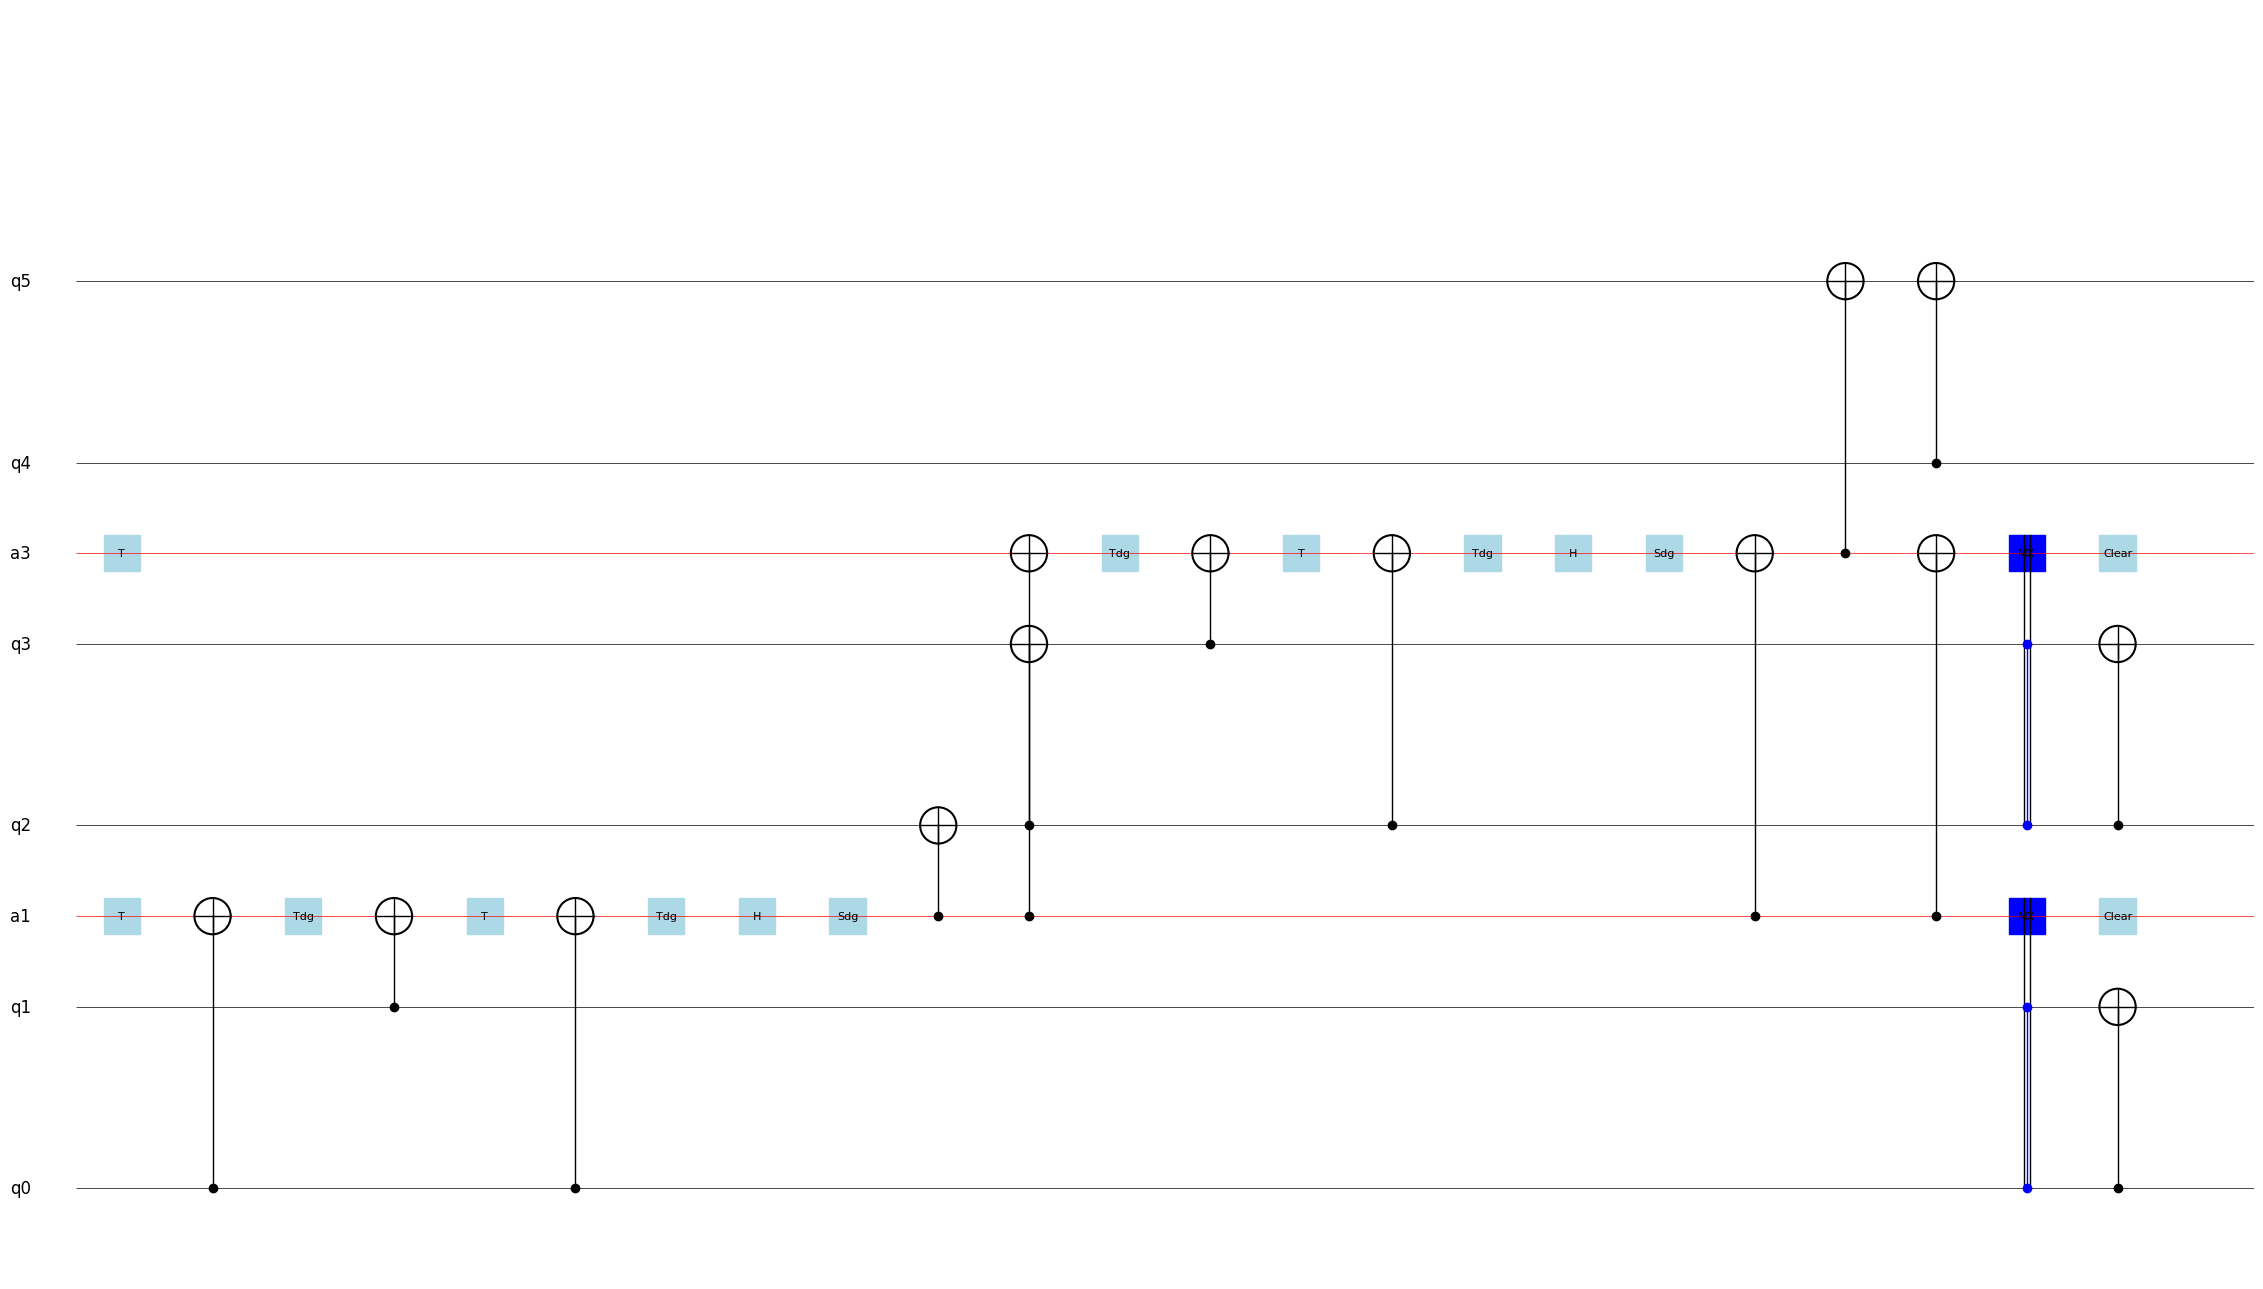

In [7]:
length = 5
N = 6
c = AbstractCircuit(0, {}, {})
working_qubits = []
target_qubits = []
for i in range(N):
    c.add_data()
for i in range(N//2):
    working_qubits.append(c[2*i+1])
    target_qubits.append(c[2*i])
table = {0:1, 1:2, 2:3, 3:4, 4:5, 5:5, 6:6, 7:7}
# c.lookup(table, control_qubits, target_qubits)
c.add(target_qubits, working_qubits)
c.draw_circuit()

In [8]:
L = 5
bin1 = format(30, f'0{L}b')
bin2 = format(1, f'0{L}b')
print(find_greatest_diff_bit(bin1, bin2))
print(bin1)
print(bin2)

4
11110
00001
